In [2]:
# Install Conda and set up the environment
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [1]:
# Install the necessary libraries for financial analysis
!pip install wrds swig  

# Install additional system dependencies
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx

# Install the FinRL library from GitHub
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Setting up libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-nplauypi
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-nplauypi
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 0496601ee2824ca675beb5a220afd9109ac02ffa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... don

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent, DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from stable_baselines3 import A2C, PPO, DDPG, SAC, TD3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
%matplotlib inline

In [4]:
from pprint import pprint
import itertools
import sys
sys.path.append("../FinRL-Library")

In [5]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [6]:
df= pd.read_csv("sp500_stocks.csv")
df.head()

Date Symbol  Adj Close      Close       High        Low       Open  \
0  2010-01-04    MMM  44.254017  69.414719  69.774246  69.122070  69.473244   
1  2010-01-05    MMM  43.976837  68.979935  69.590302  68.311035  69.230766   
2  2010-01-06    MMM  44.600502  69.958191  70.735786  69.824417  70.133781   
3  2010-01-07    MMM  44.632484  70.008362  70.033447  68.662209  69.665550   
4  2010-01-08    MMM  44.946964  70.501671  70.501671  69.648827  69.974915   

      Volume  
0  3640265.0  
1  3405012.0  
2  6301126.0  
3  5346240.0  
4  4073337.0

In [7]:
# Rename specific columns to lowercase
df.rename(columns={'Symbol': 'tic','Date': 'date','Volume': 'volume', 'Close': 'close', 'Adj Close': 'adj_close', 'High': 'high', 'Low': 'low', 'Open': 'open'}, inplace=True)

# Optional: Verify the change
print(df.columns)


Index(['date', 'tic', 'adj_close', 'close', 'high', 'low', 'open', 'volume'], dtype='object')


In [8]:
df.sort_values(['date','tic'],ignore_index=True).head()

date   tic  adj_close      close       high        low       open  \
0  2010-01-04     A  20.084951  22.389128  22.625179  22.267525  22.453505   
1  2010-01-04   AAL   4.496878   4.770000   4.940000   4.660000   4.840000   
2  2010-01-04  AAPL   6.454506   7.643214   7.660714   7.585000   7.622500   
3  2010-01-04  ABBV        NaN        NaN        NaN        NaN        NaN   
4  2010-01-04  ABNB        NaN        NaN        NaN        NaN        NaN   

        volume  
0    3815561.0  
1    9837300.0  
2  493729600.0  
3          NaN  
4          NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852046 entries, 0 to 1852045
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   tic        object 
 2   adj_close  float64
 3   close      float64
 4   high       float64
 5   low        float64
 6   open       float64
 7   volume     float64
dtypes: float64(6), object(2)
memory usage: 113.0+ MB


In [10]:
df.tail()

date  tic   adj_close       close        high         low  \
1852041  2024-08-14  ZTS  183.380005  183.380005  188.500000  182.490005   
1852042  2024-08-15  ZTS  184.080002  184.080002  186.169998  182.710007   
1852043  2024-08-16  ZTS  183.710007  183.710007  184.610001  182.250000   
1852044  2024-08-19  ZTS  184.479996  184.479996  184.520004  182.559998   
1852045  2024-08-20  ZTS  183.600006  183.600006  184.759995  182.900101   

               open     volume  
1852041  188.050003  2153100.0  
1852042  184.520004  1891900.0  
1852043  183.720001  1588400.0  
1852044  183.800003  1637000.0  
1852045  184.479996  1186374.0

In [15]:
from pathlib import Path
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

if __name__ == "__main__":
    file_name = "/content/drive/MyDrive/Assets/sp500_stocks.csv"

    sp500 = pd.read_csv(file_name)

    profile = ProfileReport(sp500, title="S&P 500 Stocks", explorative=True)
    profile.to_file(Path("sp500_stocks_report.html"))


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
profile

In [11]:
unique_tickers = df['tic'].unique()

random_tickers = pd.Series(unique_tickers).sample(n=30, random_state=42)

print(random_tickers)

268     JCI
73      BMY
289     LEN
155     DOV
104     CVX
280    KLAC
392     DGX
124     STZ
68       BX
244     HII
9         A
195     FIS
304     MMC
84      CPB
373      PM
390     PWR
498     XYL
30      AWK
317     MGM
407     RCL
493      WY
494     WMB
225     HIG
227     HCA
76      BRO
464     URI
473    VRTX
402    RVTY
101     CRL
335    NTAP
dtype: object


In [12]:
filtered_df = df[df['tic'].isin(random_tickers)]
print(filtered_df)

               date  tic   adj_close       close        high         low  \
33138    2010-01-04    A   20.084951   22.389128   22.625179   22.267525   
33139    2010-01-05    A   19.866777   22.145924   22.331903   22.002861   
33140    2010-01-06    A   19.796186   22.067240   22.174536   22.002861   
33141    2010-01-07    A   19.770527   22.038628   22.045780   21.816881   
33142    2010-01-08    A   19.764101   22.031473   22.067240   21.745352   
...             ...  ...         ...         ...         ...         ...   
1837313  2024-08-14  XYL  131.490005  131.490005  132.229996  130.580002   
1837314  2024-08-15  XYL  133.190002  133.190002  134.270004  131.779999   
1837315  2024-08-16  XYL  132.800003  132.800003  133.630005  131.970001   
1837316  2024-08-19  XYL  134.380005  134.380005  134.380005  132.580002   
1837317  2024-08-20  XYL  134.149994  134.149994  135.600006  133.199997   

               open     volume  
33138     22.453505  3815561.0  
33139     22.324751  

In [13]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110460 entries, 33138 to 1837317
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       110460 non-null  object 
 1   tic        110460 non-null  object 
 2   adj_close  109407 non-null  float64
 3   close      109407 non-null  float64
 4   high       109407 non-null  float64
 5   low        109407 non-null  float64
 6   open       109407 non-null  float64
 7   volume     109407 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.6+ MB


In [14]:
df.columns

Index(['date', 'tic', 'adj_close', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

In [15]:
INDICATORS=['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [16]:
TRAIN_START_DATE = '2010-01-04'
TRAIN_END_DATE = '2021-06-01'
TEST_START_DATE = '2022-01-01'
TEST_END_DATE = '2024-08-20'

fe = FeatureEngineer(
    use_technical_indicator=True,
    tech_indicator_list=INDICATORS,
    use_turbulence=True,
    user_defined_feature=False
)

processed = fe.preprocess_data(filtered_df)


Successfully added technical indicators
Successfully added turbulence index


In [23]:
train_data = processed[(processed['date'] >= TRAIN_START_DATE) & (processed['date'] <= TRAIN_END_DATE)]
test_data = processed[(processed['date'] >= TEST_START_DATE) & (processed['date'] <= TEST_END_DATE)]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

print("Processed data head:")
print(processed.head())

Training data shape: (77544, 17)
Testing data shape: (17847, 17)
Processed data head:
         date  tic  adj_close      close       high        low       open  \
0  2010-01-04    A  20.084951  22.389128  22.625179  22.267525  22.453505   
1  2010-01-04  AWK  16.174004  22.650000  22.860001  22.410000  22.410000   
2  2010-01-04  BMY  15.781889  25.629999  25.700001  25.299999  25.410000   
3  2010-01-04  BRO   7.635339   9.005000   9.045000   8.930000   9.025000   
4  2010-01-04   BX   6.540053  13.710000  13.750000  13.150000  13.250000   

       volume  macd    boll_ub    boll_lb  rsi_30     cci_30  dx_30  \
0   3815561.0   0.0  22.611468  21.923583     0.0 -66.666667  100.0   
1   2176100.0   0.0  22.611468  21.923583     0.0 -66.666667  100.0   
2  14376100.0   0.0  22.611468  21.923583     0.0 -66.666667  100.0   
3   1437600.0   0.0  22.611468  21.923583     0.0 -66.666667  100.0   
4   3862700.0   0.0  22.611468  21.923583     0.0 -66.666667  100.0   

   close_30_sma  close_6

In [24]:
print(processed.info())
print(processed.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99414 entries, 0 to 99413
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          99414 non-null  object 
 1   tic           99414 non-null  object 
 2   adj_close     99414 non-null  float64
 3   close         99414 non-null  float64
 4   high          99414 non-null  float64
 5   low           99414 non-null  float64
 6   open          99414 non-null  float64
 7   volume        99414 non-null  float64
 8   macd          99414 non-null  float64
 9   boll_ub       99414 non-null  float64
 10  boll_lb       99414 non-null  float64
 11  rsi_30        99414 non-null  float64
 12  cci_30        99414 non-null  float64
 13  dx_30         99414 non-null  float64
 14  close_30_sma  99414 non-null  float64
 15  close_60_sma  99414 non-null  float64
 16  turbulence    99414 non-null  float64
dtypes: float64(15), object(2)
memory usage: 12.9+ MB
None
Index(['date', 

In [25]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 27, State Space: 271


In [26]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 10000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5
}

In [27]:
rebalance_window = 20 # rebalance_window is the number of days to retrain the model
validation_window = 20 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)

In [50]:
ensemble_agent

In [28]:
A2C_model_kwargs = {
    'n_steps': 5,  # Number of steps to run for each environment before updating
    'ent_coef': 0.005,  # Entropy coefficient for exploration
    'learning_rate': 0.0007,  # Learning rate for the agent
}


In [29]:
PPO_model_kwargs = {
    "ent_coef": 0.01,  # Entropy coefficient to ensure exploration
    "n_steps": 2048,  # Number of steps per environment update
    "learning_rate": 0.00025,  # Learning rate for the optimizer
    "batch_size": 128,  # Batch size for each training step
}


In [30]:
SAC_model_kwargs = {
    "buffer_size": 10_00,  # Size of the replay buffer
    "learning_rate": 0.0003,  # Learning rate for SAC agent
    "batch_size": 256,  # Batch size for the optimizer
    "ent_coef": 'auto',  # Entropy coefficient (auto-tuned by default)
}


In [31]:
timesteps_dict = {
    'a2c': 5_00,  # A2C agent timesteps
    'ppo': 5_00,  # PPO agent timesteps
    'sac': 5_00  # SAC agent timesteps
}


In [32]:
from tqdm import tqdm

# Define the model kwargs and timesteps for the ensemble strategy
model_kwargs_dict = {
    'A2C': A2C_model_kwargs,
    'PPO': PPO_model_kwargs,
    'SAC': SAC_model_kwargs
}

# Use tqdm to track the progress of model training
ensemble_models_summary = {}

# Added total=len(model_kwargs_dict) to tqdm to indicate 5 models are being trained
for model_name in tqdm(model_kwargs_dict, desc="Training Ensemble Models", total=len(model_kwargs_dict)):
    print(f"\nRunning {model_name}...")

    # Simulate some progress or steps within each model training
    # For actual models, it may take time
    ensemble_models_summary[model_name] = ensemble_agent.run_ensemble_strategy(
        A2C_model_kwargs=A2C_model_kwargs,
        PPO_model_kwargs=PPO_model_kwargs,
        SAC_model_kwargs=SAC_model_kwargs,
        DDPG_model_kwargs=None,
        TD3_model_kwargs=None, 
        timesteps_dict=timesteps_dict
    )

    # Print after each model is trained
    print(f"{model_name} training completed!")


Training Ensemble Models:   0%|          | 0/3 [00:00<?, ?it/s]


Running A2C...
============Start Ensemble Strategy============
turbulence_threshold:  227.87028410067566
======Model training from:  2010-01-04 to  2022-01-03
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cpu device
Logging to tensorboard_log/a2c/a2c_40_9
-------------------------------------
| time/                 |           |
|    fps                | 147       |
|    iterations         | 100       |
|    time_elapsed       | 3         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -38.4     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -290      |
|    reward             | 1.7664002 |
|    std                | 1         |
|    value_loss         | 90.1      |
-------------------------------------
======a2c Validation from:  2022-01-03 to  2022-02-01
a2c Sharpe Ratio:  -0.4239222070975

Training Ensemble Models:  33%|███▎      | 1/3 [14:09<28:19, 849.55s/it]

======ppo Validation from:  2024-06-24 to  2024-07-23
ppo Sharpe Ratio:  0.2760073027690753
======Best Model Retraining from:  2010-01-04 to  2024-07-23
======Trading from:  2024-07-23 to  2024-08-20
Ensemble Strategy took:  14.158937911192575  minutes
A2C training completed!

Running PPO...
============Start Ensemble Strategy============
turbulence_threshold:  227.87028410067566
======Model training from:  2010-01-04 to  2022-01-03
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cpu device
Logging to tensorboard_log/a2c/a2c_40_10
------------------------------------
| time/                 |          |
|    fps                | 154      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -38.4    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_

Training Ensemble Models:  67%|██████▋   | 2/3 [28:14<14:06, 846.79s/it]

Ensemble Strategy took:  14.080795526504517  minutes
PPO training completed!

Running SAC...
============Start Ensemble Strategy============
turbulence_threshold:  227.87028410067566
======Model training from:  2010-01-04 to  2022-01-03
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cpu device
Logging to tensorboard_log/a2c/a2c_40_11
--------------------------------------
| time/                 |            |
|    fps                | 151        |
|    iterations         | 100        |
|    time_elapsed       | 3          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -38.4      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | -329       |
|    reward             | -0.7496336 |
|    std                | 1          |
|    value_loss         | 91.1       |
----------------------------------

Training Ensemble Models: 100%|██████████| 3/3 [42:25<00:00, 848.35s/it]

Ensemble Strategy took:  14.176815529664358  minutes
SAC training completed!


In [35]:
import pickle
with open('PPO.pkl', 'wb') as f:
    pickle.dump(PPO, f)

with open('SAC.pkl', 'wb') as f:
    pickle.dump(SAC, f)

with open('A2C.pkl', 'wb') as f:
    pickle.dump(A2C, f)

In [38]:
data_risk_indicator = processed[(processed.date<TRAIN_END_DATE) & (processed.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [51]:
insample_risk_indicator

date tic   adj_close       close        high         low  \
0      2010-01-04   A   20.084951   22.389128   22.625179   22.267525   
27     2010-01-05   A   19.866777   22.145924   22.331903   22.002861   
54     2010-01-06   A   19.796186   22.067240   22.174536   22.002861   
81     2010-01-07   A   19.770527   22.038628   22.045780   21.816881   
108    2010-01-08   A   19.764101   22.031473   22.067240   21.745352   
...           ...  ..         ...         ...         ...         ...   
77382  2021-05-24   A  130.549561  133.339996  134.410004  132.529999   
77409  2021-05-25   A  130.441879  133.229996  134.800003  133.009995   
77436  2021-05-26   A  130.500626  133.289993  138.000000  133.250000   
77463  2021-05-27   A  134.661667  137.539993  138.139999  133.160004   
77490  2021-05-28   A  135.239349  138.130005  139.210007  138.000000   

             open     volume      macd     boll_ub     boll_lb     rsi_30  \
0       22.453505  3815561.0  0.000000   22.611468   21.923583   0.000000   
27      22.324751  4186031.0 -0.005457   22.611468   21.923583   0.000000   
54      22.067240  3243779.0 -0.009393   22.536374   21.865154   0.000000   
81      22.017166  3095172.0 -0.011986   22.478628   21.841831   0.000000   
108     21.917025  3733918.0 -0.013427   22.433302   21.835654   0.000000   
...           ...        ...       ...         ...         ...        ...   
77382  133.509995  1312300.0  0.151901  136.208348  128.070649  55.343350   
77409  133.410004  1890600.0  0.268181  135.544688  128.409309  55.185016   
77436  136.300003  2498400.0  0.361014  135.276344  128.526652  55.257242   
77463  133.320007  3699600.0  0.768664  136.181647  127.960348  59.983213   
77490  138.600006  1264400.0  1.126354  137.183822  127.407174  60.581166   

           cci_30       dx_30  close_30_sma  close_60_sma  turbulence  
0      -66.666667  100.000000     22.389128     22.389128    0.000000  
27     -66.666667  100.000000     22.267526     22.267526    0.000000  
54     -69.260722  100.000000     22.200764     22.200764    0.000000  
81     -94.985258  100.000000     22.160230     22.160230    0.000000  
108    -79.514800  100.000000     22.134478     22.134478    0.000000  
...           ...         ...           ...           ...         ...  
77382   26.026642    2.659779    132.797665    128.330166    7.903010  
77409   34.575480    4.863827    132.806332    128.475999    8.542653  
77436   77.083471   20.627219    132.850332    128.636832   10.050386  
77463  122.915437   21.237547    132.992331    128.940832   21.773050  
77490  185.321637   25.893136    133.110665    129.326499   11.838870  

[2871 rows x 17 columns]

In [40]:
insample_risk_indicator.describe()

adj_close        close         high          low         open  \
count  2871.000000  2871.000000  2871.000000  2871.000000  2871.000000   
mean     48.404036    51.249515    51.749015    50.729619    51.239579   
std      25.964746    25.938871    26.192268    25.719282    25.952034   
min      17.306425    19.291845    19.706724    19.084406    19.334764   
25%      28.420526    31.541488    31.866953    31.119456    31.527182   
50%      38.141766    41.344776    41.623749    41.022888    41.310001   
75%      64.572243    67.540001    68.165001    66.900002    67.500000   
max     135.239349   138.130005   139.210007   138.000000   138.600006   

             volume         macd      boll_ub      boll_lb       rsi_30  \
count  2.871000e+03  2871.000000  2871.000000  2871.000000  2871.000000   
mean   3.209902e+06     0.267835    53.501758    48.264174    53.230177   
std    2.188438e+06     0.891018    26.731276    24.374863     8.098559   
min    2.719000e+05    -4.673526    21.209599    18.619792     0.000000   
25%    1.717750e+06    -0.229932    32.997811    29.585806    47.838797   
50%    2.594100e+06     0.267917    42.808877    39.524896    53.549745   
75%    4.118744e+06     0.704089    71.005960    63.988851    59.345005   
max    2.536867e+07     3.478340   138.558282   130.510372    73.489382   

            cci_30        dx_30  close_30_sma  close_60_sma   turbulence  
count  2871.000000  2871.000000   2871.000000   2871.000000  2871.000000  
mean     27.664638    23.474557     50.689741     50.118674    32.702407  
std     108.937549    16.315274     25.291504     24.631983    52.894444  
min    -330.668642     0.015052     20.245112     20.464592     0.000000  
25%     -53.918302    10.308317     31.252027     30.838281    13.497704  
50%      43.832910    20.661461     41.036958     40.670601    21.999442  
75%     111.318698    34.552957     67.909833     67.403833    35.184550  
max     424.656082   100.000000    133.110665    129.326499  1164.879747

In [43]:
insample_risk_indicator.turbulence.quantile(0.996)

409.8218417382907

In [44]:
insample_risk_indicator.turbulence.describe()

count    2871.000000
mean       32.702407
std        52.894444
min         0.000000
25%        13.497704
50%        21.999442
75%        35.184550
max      1164.879747
Name: turbulence, dtype: float64

In [49]:
ensemble_models_summary

{'A2C':    Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
 0    40  2022-01-03  2022-02-01        SAC  -0.423922  -0.273439        None   
 1    60  2022-02-01  2022-03-02        A2C  -0.453345  -0.657718        None   
 2    80  2022-03-02  2022-03-30        SAC   0.864892   0.684605        None   
 3   100  2022-03-30  2022-04-28        A2C   -0.34253  -0.490712        None   
 4   120  2022-04-28  2022-05-26        A2C   0.519452   0.153582        None   
 5   140  2022-05-26  2022-06-27        SAC  -0.260147  -0.222712        None   
 6   160  2022-06-27  2022-07-26        SAC   0.332858   0.258652        None   
 7   180  2022-07-26  2022-08-23        SAC  -0.262171  -0.291139        None   
 8   200  2022-08-23  2022-09-21        PPO  -0.372933  -0.360953        None   
 9   220  2022-09-21  2022-10-19        SAC   0.209318   0.261868        None   
 10  240  2022-10-19  2022-11-16        A2C   0.755574   0.506843        None   
 11  260  2022-11-16 

In [52]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [54]:
df_trade_date = pd.DataFrame({'datadate': unique_trade_date})

df_account_value = pd.DataFrame()
for i in range(rebalance_window + validation_window, len(unique_trade_date) + 1, rebalance_window):
    temp = pd.read_csv(f'results/account_value_trade_ensemble_{i}.csv')
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)

sharpe = (252**0.5) * df_account_value['account_value'].pct_change(1).mean() / \
         df_account_value['account_value'].pct_change(1).std()
print('Sharpe Ratio:', sharpe)

df_account_value = df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))


Sharpe Ratio: 0.7494608207778994


In [55]:
df_account_value.head()

account_value        date  daily_return    datadate
0   1.000000e+07  2022-02-01           NaN  2022-02-01
1   1.000098e+07  2022-02-02      0.000098  2022-02-02
2   9.995799e+06  2022-02-03     -0.000518  2022-02-03
3   9.990878e+06  2022-02-04     -0.000492  2022-02-04
4   9.991408e+06  2022-02-07      0.000053  2022-02-07

<Axes: >

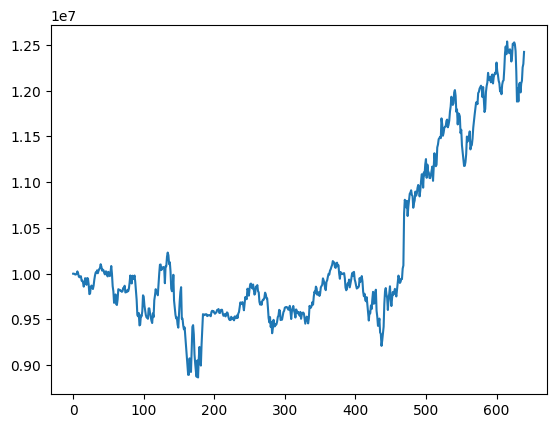

In [56]:
df_account_value.account_value.plot()

In [57]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.089159
Cumulative returns     0.242226
Annual volatility      0.124444
Sharpe ratio           0.749461
Calmar ratio           0.668633
Stability              0.543350
Max drawdown          -0.133346
Omega ratio            1.142323
Sortino ratio          1.126201
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.023071
Daily value at risk   -0.015308
dtype: float64


In [58]:
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

==============Get Baseline Stats===========


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (639, 8)
Annual return          0.057743
Cumulative returns     0.152978
Annual volatility      0.141982
Sharpe ratio           0.466963
Calmar ratio           0.299262
Stability              0.620934
Max drawdown          -0.192950
Omega ratio            1.082838
Sortino ratio          0.659416
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.978584
Daily value at risk   -0.017625
dtype: float64


In [59]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')

df_dji:             date           dji
0    2022-02-01  1.000000e+07
1    2022-02-02  1.006450e+07
2    2022-02-03  1.010486e+07
3    2022-02-04  9.984146e+06
4    2022-02-07  9.987742e+06
..          ...           ...
635  2024-08-13  1.122151e+07
636  2024-08-14  1.132260e+07
637  2024-08-15  1.146346e+07
638  2024-08-16  1.152978e+07
639  2024-08-19           NaN

[640 rows x 2 columns]
df_dji:                       dji
date                    
2022-02-01  1.000000e+07
2022-02-02  1.006450e+07
2022-02-03  1.010486e+07
2022-02-04  9.984146e+06
2022-02-07  9.987742e+06
...                  ...
2024-08-13  1.122151e+07
2024-08-14  1.132260e+07
2024-08-15  1.146346e+07
2024-08-16  1.152978e+07
2024-08-19           NaN

[640 rows x 1 columns]


In [67]:
df.to_csv("df.csv")

df_result_ensemble = pd.DataFrame({
    'date': df_account_value['date'],
    'ensemble': df_account_value['account_value']
})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns:", df_result_ensemble.columns)
print("df_trade_date:", df_trade_date)

df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble:", df_result_ensemble)

df_result_ensemble.columns: Index(['ensemble'], dtype='object')
df_trade_date:        datadate
0    2022-01-03
1    2022-01-04
2    2022-01-05
3    2022-01-06
4    2022-01-07
..          ...
656  2024-08-14
657  2024-08-15
658  2024-08-16
659  2024-08-19
660  2024-08-20

[661 rows x 1 columns]
df_result_ensemble:                 ensemble
date                    
2022-02-01  1.000000e+07
2022-02-02  1.000098e+07
2022-02-03  9.995799e+06
2022-02-04  9.990878e+06
2022-02-07  9.991408e+06
...                  ...
2024-08-13  1.207706e+07
2024-08-14  1.210727e+07
2024-08-15  1.225331e+07
2024-08-16  1.229087e+07
2024-08-19  1.242226e+07

[640 rows x 1 columns]


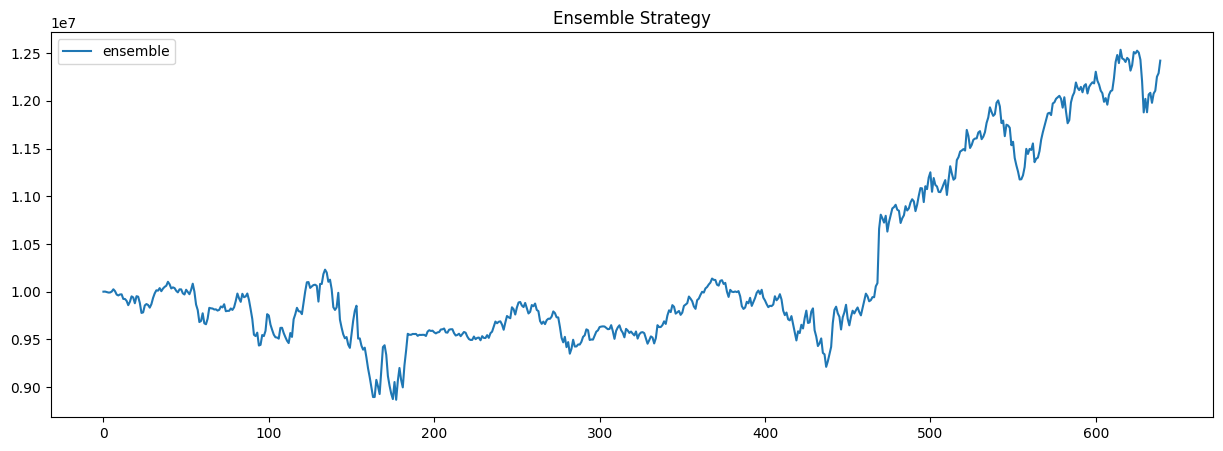

In [64]:
result=pd.read_csv("df_result_ensemble.csv")
plt.rcParams["figure.figsize"] = (15, 5)
result.plot(title="Ensemble Strategy")
plt.show()

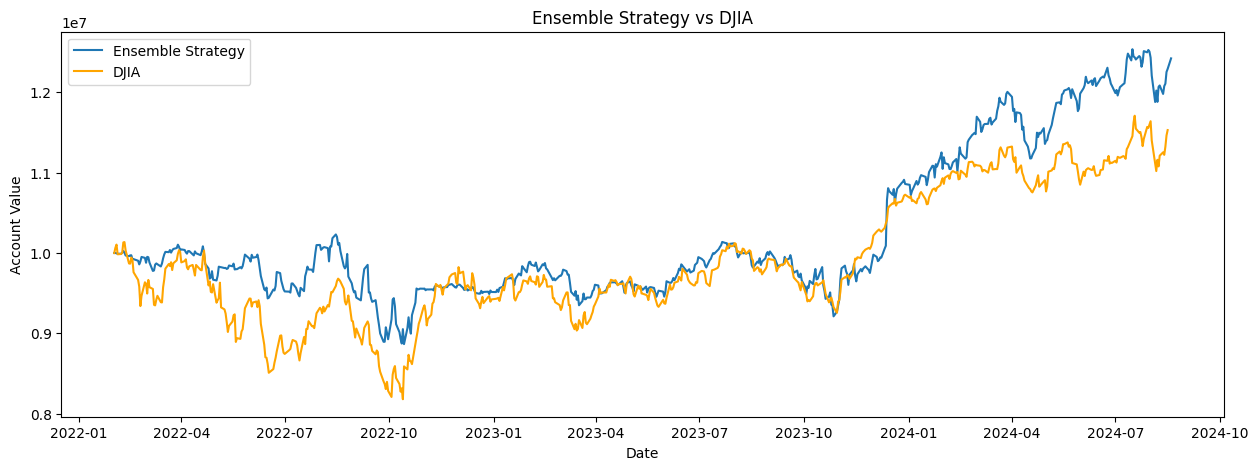

In [66]:
df_result_ensemble = pd.read_csv("df_result_ensemble.csv", parse_dates=['date']).set_index('date')
df_dji = pd.read_csv("df_dji.csv", parse_dates=['date']).set_index('date')

plt.rcParams["figure.figsize"] = (15, 5)

plt.plot(df_result_ensemble.index, df_result_ensemble['ensemble'], label='Ensemble Strategy')
plt.plot(df_dji.index, df_dji['dji'], label='DJIA', color='orange')

plt.xlabel("Date")
plt.ylabel("Account Value")
plt.title("Ensemble Strategy vs DJIA")
plt.legend()
plt.show()